In [1]:
from sklearn.datasets import fetch_california_housing
from src.methods.partial_dependence_based.h_statistic.api import FriedmanHStatistic
from src.methods.partial_dependence_based.variable_interaction.api import GreenwellVariableInteraction
from src.methods.performance_based.prediction_performance.api import SejongOhInteraction
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from src.domain.domain import VisualisationType

In [2]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target
model = RandomForestRegressor().fit(X, y)

In [3]:
vint = GreenwellVariableInteraction()
vint.fit(model, X, 5, show_progress=True)  # all features - GreenwellVariableInteraction

one vs one: 100%|██████████| 28/28 [00:05<00:00,  5.10it/s]


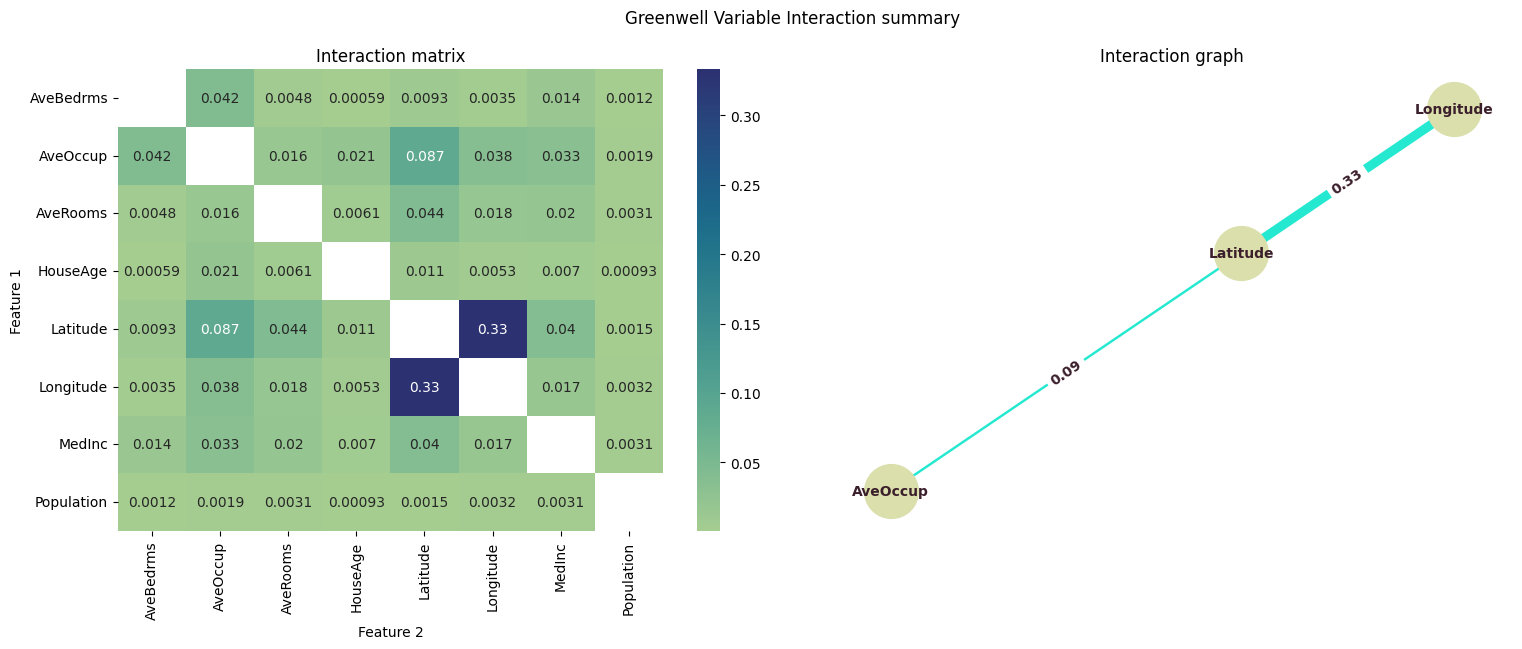

In [4]:
vint.plot()  # summary - GreenwellVariableInteraction

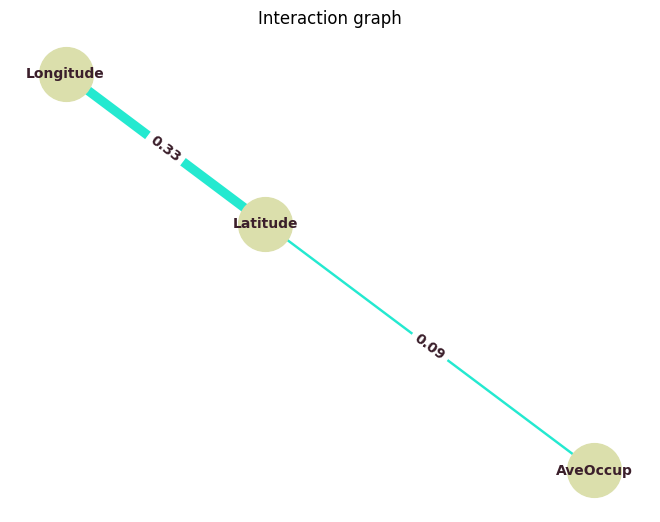

In [5]:
vint.plot(VisualisationType.INTERACTION_GRAPH)  # interaction graph - GreenwellVariableInteraction

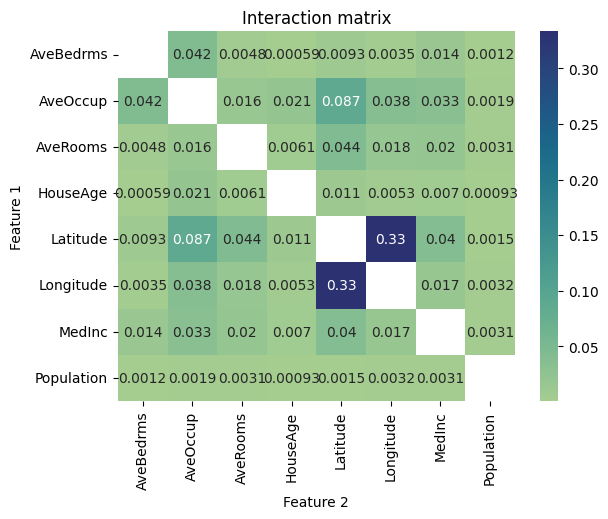

In [6]:
vint.plot(VisualisationType.HEATMAP)  # heatmap - GreenwellVariableInteraction

In [7]:
vint_subset = GreenwellVariableInteraction()
vint_subset.fit(model, X, 5, features=["Latitude", "Longitude", "HouseAge"],
                show_progress=True)  # subset of features - GreenwellVariableInteraction

one vs one: 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]


In [8]:
h_stat = FriedmanHStatistic()
h_stat.fit(model, X, 10, show_progress=True)  # all features - FriedmanHStatistic

one vs all: 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]


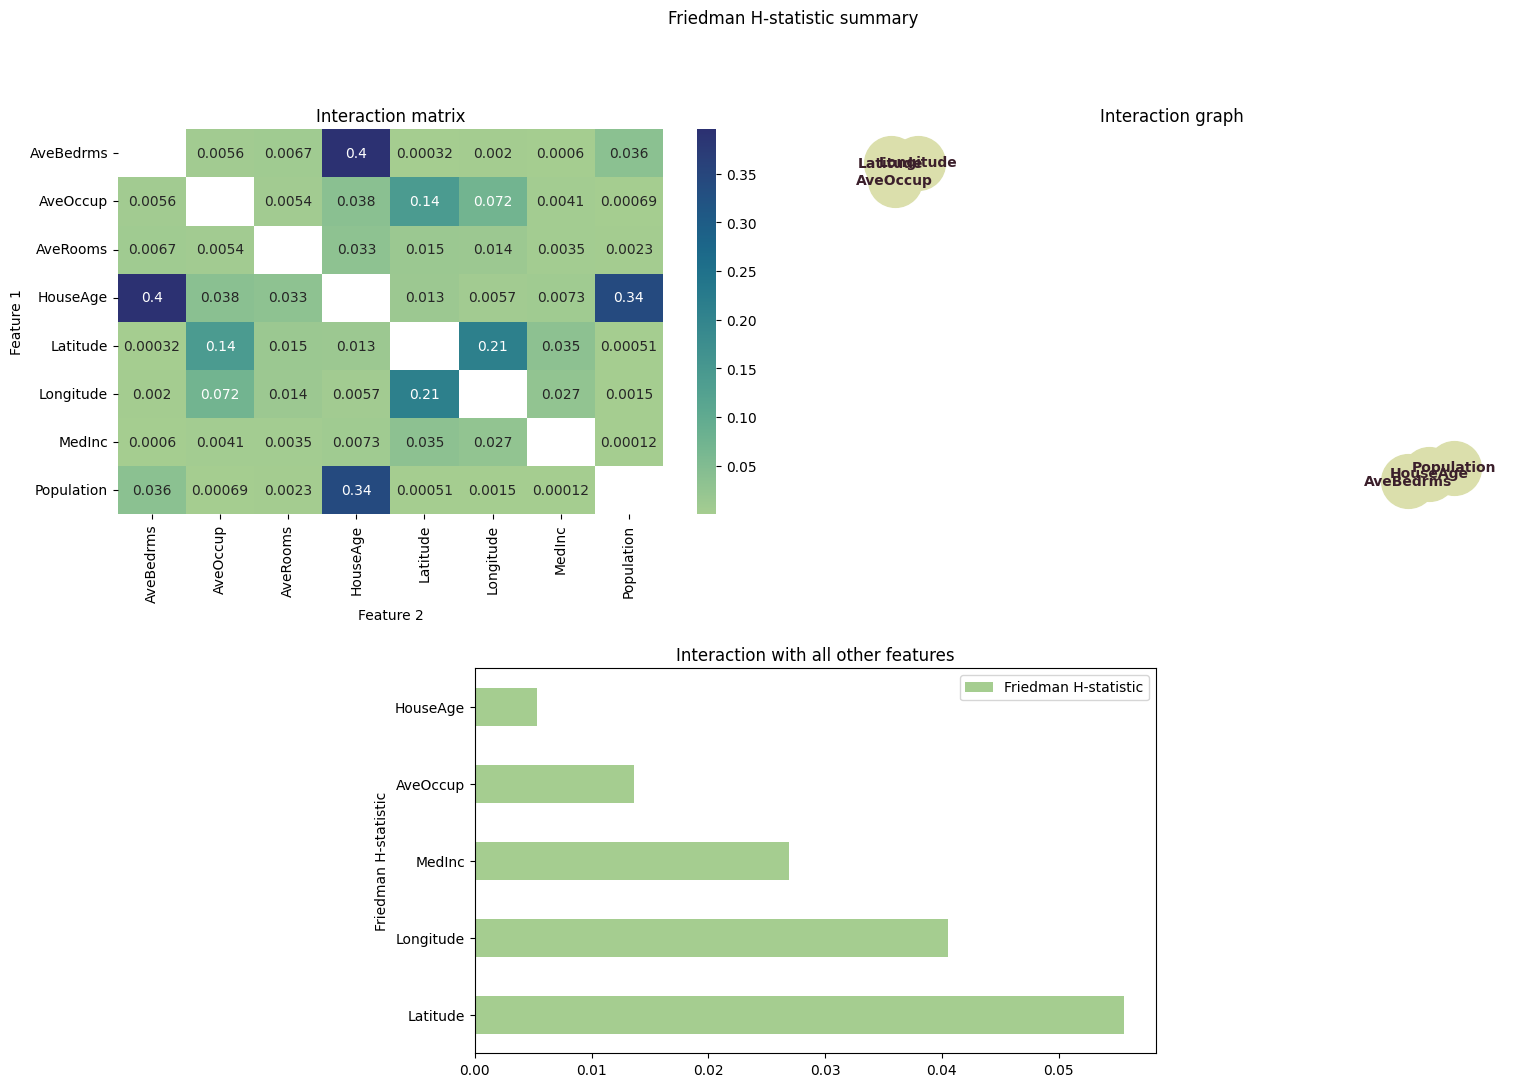

In [9]:
h_stat.plot()  # summary - FriedmanHStatistic

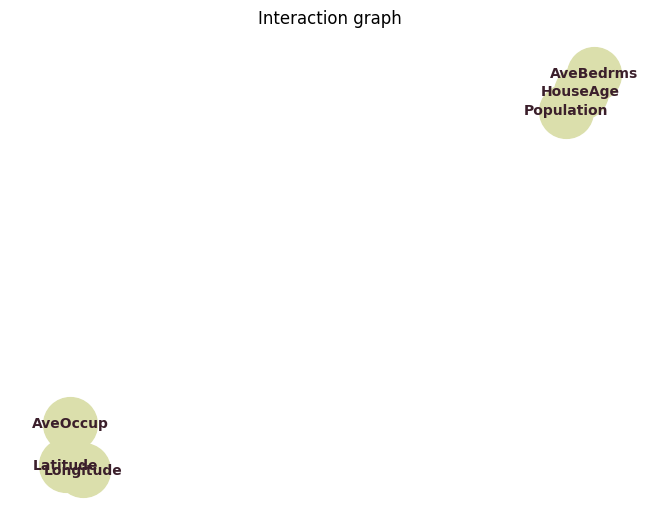

In [10]:
h_stat.plot(VisualisationType.INTERACTION_GRAPH)  # interaction graph - FriedmanHStatistic

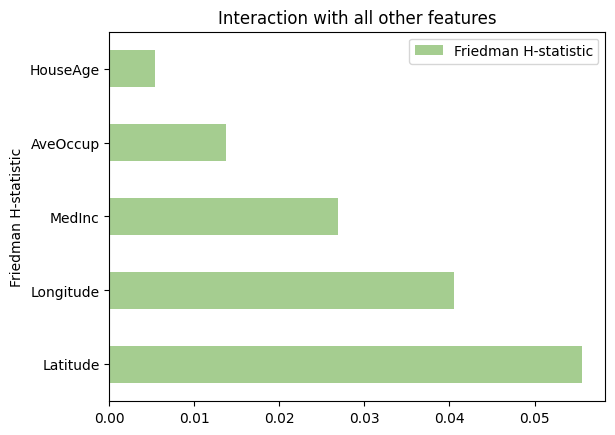

In [11]:
h_stat.plot(VisualisationType.BAR_CHART)  # bar chart - FriedmanHStatistic

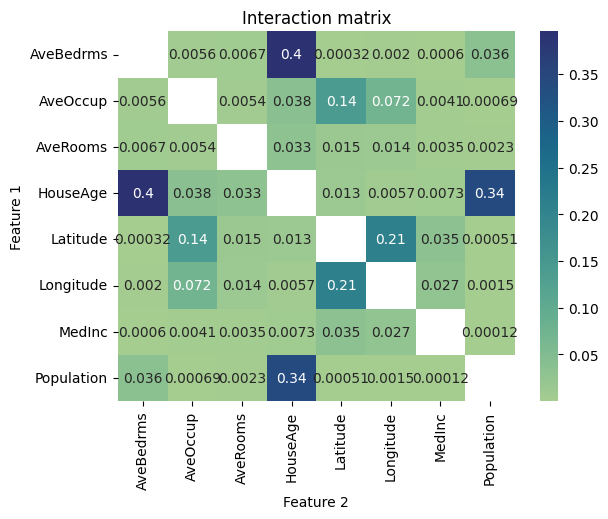

In [12]:
h_stat.plot(VisualisationType.HEATMAP)  # heatmap - FriedmanHStatistic

In [13]:
h_stat_subset = FriedmanHStatistic()
h_stat_subset.fit(model, X, 10, features=["Latitude", "Longitude", "HouseAge"],
                  show_progress=True)  # subset of features - FriedmanHStatistic

one vs all: 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


In [14]:
perf_based = SejongOhInteraction()
perf_based.fit(model, X, y, 100, show_progress=True)  # all features - SejongOhInteraction

100%|██████████| 28/28 [00:11<00:00,  2.51it/s]


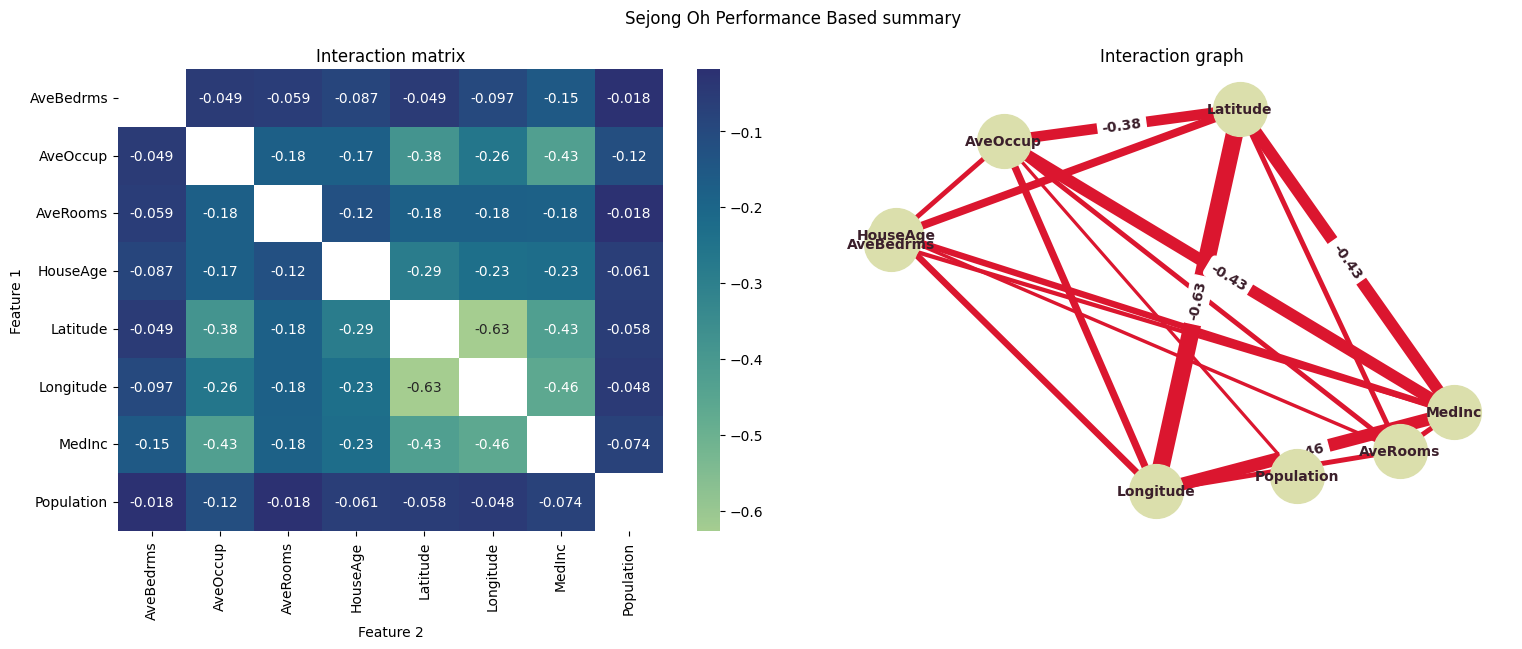

In [15]:
perf_based.plot()  # summary - SejongOhInteraction

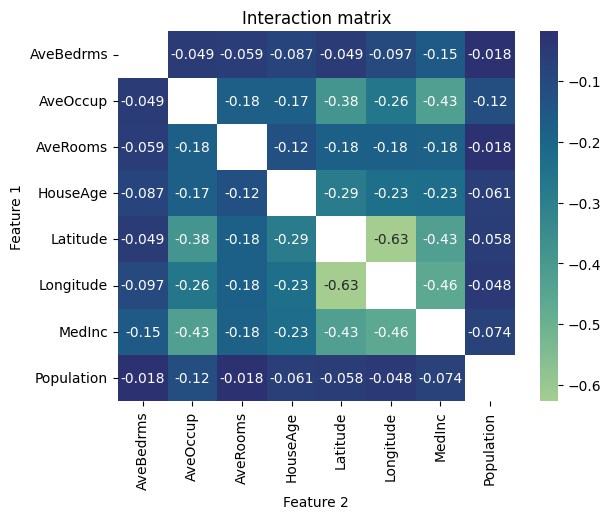

In [16]:
perf_based.plot(VisualisationType.HEATMAP)  # heatmap - SejongOhInteraction

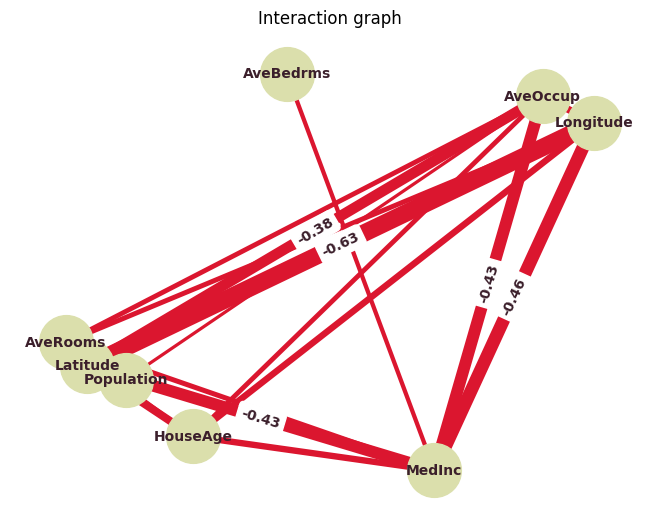

In [17]:
perf_based.plot(VisualisationType.INTERACTION_GRAPH)  # interaction graph - SejongOhInteraction

In [18]:
perf_based = SejongOhInteraction()
perf_based.fit(model, X, y, 500, features=["Latitude", "Longitude", "HouseAge"], show_progress=True)  # subset of features - SejongOhInteraction

100%|██████████| 3/3 [00:02<00:00,  1.24it/s]


In [19]:
perf_based.ovo

,Feature 1,Feature 2,Sejong Oh Performance Based
0,Latitude,Longitude,-0.541576
1,Latitude,HouseAge,-0.194323
2,Longitude,HouseAge,-0.146629
